In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
from utils import *

In [2]:
def jacobi_2nd(A, b, tol=1e-8, max_iterations=1000):
    x = np.zeros_like(b, dtype=np.double)
    D = sparse.diags(A.diagonal()).tocsc()
    invD = sparse.linalg.inv(D)
    LU = A - D
    for k in range(max_iterations):     
        x_new = invD@(b - LU@x)
        diff = np.linalg.norm(x_new - x)
        loss = np.linalg.norm(A@x_new - b)
        print(f'itr:{k} Difference: {diff:.3e},  Loss:{loss:.2e}')
        if diff < tol:    break
        x = x_new
    return x

def gauess_seidel(A, b, tol=1e-8, max_iterations=1000):
    x = np.zeros_like(b, dtype=np.double)
    L = sparse.tril(A)
    U = sparse.triu(A, 1)
    
    Linv = sparse.linalg.inv((L).tocsc())

    for k in range(max_iterations):     
        x_new = Linv @ (b - U@x)
        diff = np.linalg.norm(x_new - x)
        loss = np.linalg.norm(A@x_new - b)
        print(f'itr:{k} Difference: {diff:.3e},  Loss:{loss:.2e}')
        if diff < tol:    break
        x = x_new
    return x

def my_cg(A, b, x, tol=1e-8, max_iter=1000):
#     x = np.zeros_like(b, dtype=np.double)
    r = b - A@x
    p = r
    for k in range(max_iter):
        if np.linalg.norm(r) < tol:
            break
        alpha = (r.T@r)/(p.T@A@p)
        x_new = x + alpha * p
        r1 = r - alpha * A @ p
        beta = (r1.T@r1)/(r.T@r)
        p = r1 + beta * p
        r = r1    
        
        diff = np.linalg.norm(x_new - x)
        loss = np.linalg.norm(A@x_new - b)
        print(f'itr:{k} Difference: {diff:.3e},  Loss:{loss:.2e}')
        if diff < tol:    break
        x = x_new
    return x_new

def rhs_cg(A, b, x):
    r = b - A@x
    alpha = (r.T@r) / (r.T@A@r)
    r1 = r - alpha * A @ r
    beta = (r1.T@r1)/(r.T@r)
    p = r1 + beta * r
    alpha = (r.T@r)/(p.T@A@p)
    x = x + alpha * p
    return x

def is_pos_def(x):
    return np.all(sparse.linalg.eigs(x)[0] > 0)

In [27]:
n = 33
a = 1
h = 2/(n-1)
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
xx, yy = np.meshgrid(x, y)
f = -normal(xx, yy, h)

A = fd_A_neu(n).tocsr()
b = fd_b_bc(f, h)
# print(is_pos_def(A))
# print(sparse.linalg.eigs(A))
# b = apply_neumann_bc(b, h, f, bcs={'top':1, 'bottom':1})
# b = apply_diri_bc(b, bcs={'left': 1, 'right': 1})
w = spsolve(A, b).reshape(n, n)
# u = sparse.linalg.cg(A, b)[0].reshape(n, n)
u = jacobi_2nd(A, b).reshape(n, n)
# u = my_cg(A, b, np.zeros_like(b)).reshape(n, n)
# u = gauess_seidel(A, b).reshape(n, n)
# u = jacobi(A_bc.todense(), b_bc[:, np.newaxis]).reshape(n, n)


itr:0 Difference: 7.053e-02,  Loss:2.27e-01
itr:1 Difference: 5.665e-02,  Loss:1.96e-01
itr:2 Difference: 4.903e-02,  Loss:1.76e-01
itr:3 Difference: 4.390e-02,  Loss:1.61e-01
itr:4 Difference: 4.013e-02,  Loss:1.49e-01
itr:5 Difference: 3.721e-02,  Loss:1.39e-01
itr:6 Difference: 3.484e-02,  Loss:1.32e-01
itr:7 Difference: 3.288e-02,  Loss:1.25e-01
itr:8 Difference: 3.122e-02,  Loss:1.19e-01
itr:9 Difference: 2.979e-02,  Loss:1.14e-01
itr:10 Difference: 2.854e-02,  Loss:1.10e-01
itr:11 Difference: 2.744e-02,  Loss:1.06e-01
itr:12 Difference: 2.645e-02,  Loss:1.02e-01
itr:13 Difference: 2.557e-02,  Loss:9.91e-02
itr:14 Difference: 2.476e-02,  Loss:9.61e-02
itr:15 Difference: 2.403e-02,  Loss:9.35e-02
itr:16 Difference: 2.336e-02,  Loss:9.10e-02
itr:17 Difference: 2.275e-02,  Loss:8.87e-02
itr:18 Difference: 2.218e-02,  Loss:8.66e-02
itr:19 Difference: 2.165e-02,  Loss:8.46e-02
itr:20 Difference: 2.115e-02,  Loss:8.28e-02
itr:21 Difference: 2.069e-02,  Loss:8.10e-02
itr:22 Difference: 2

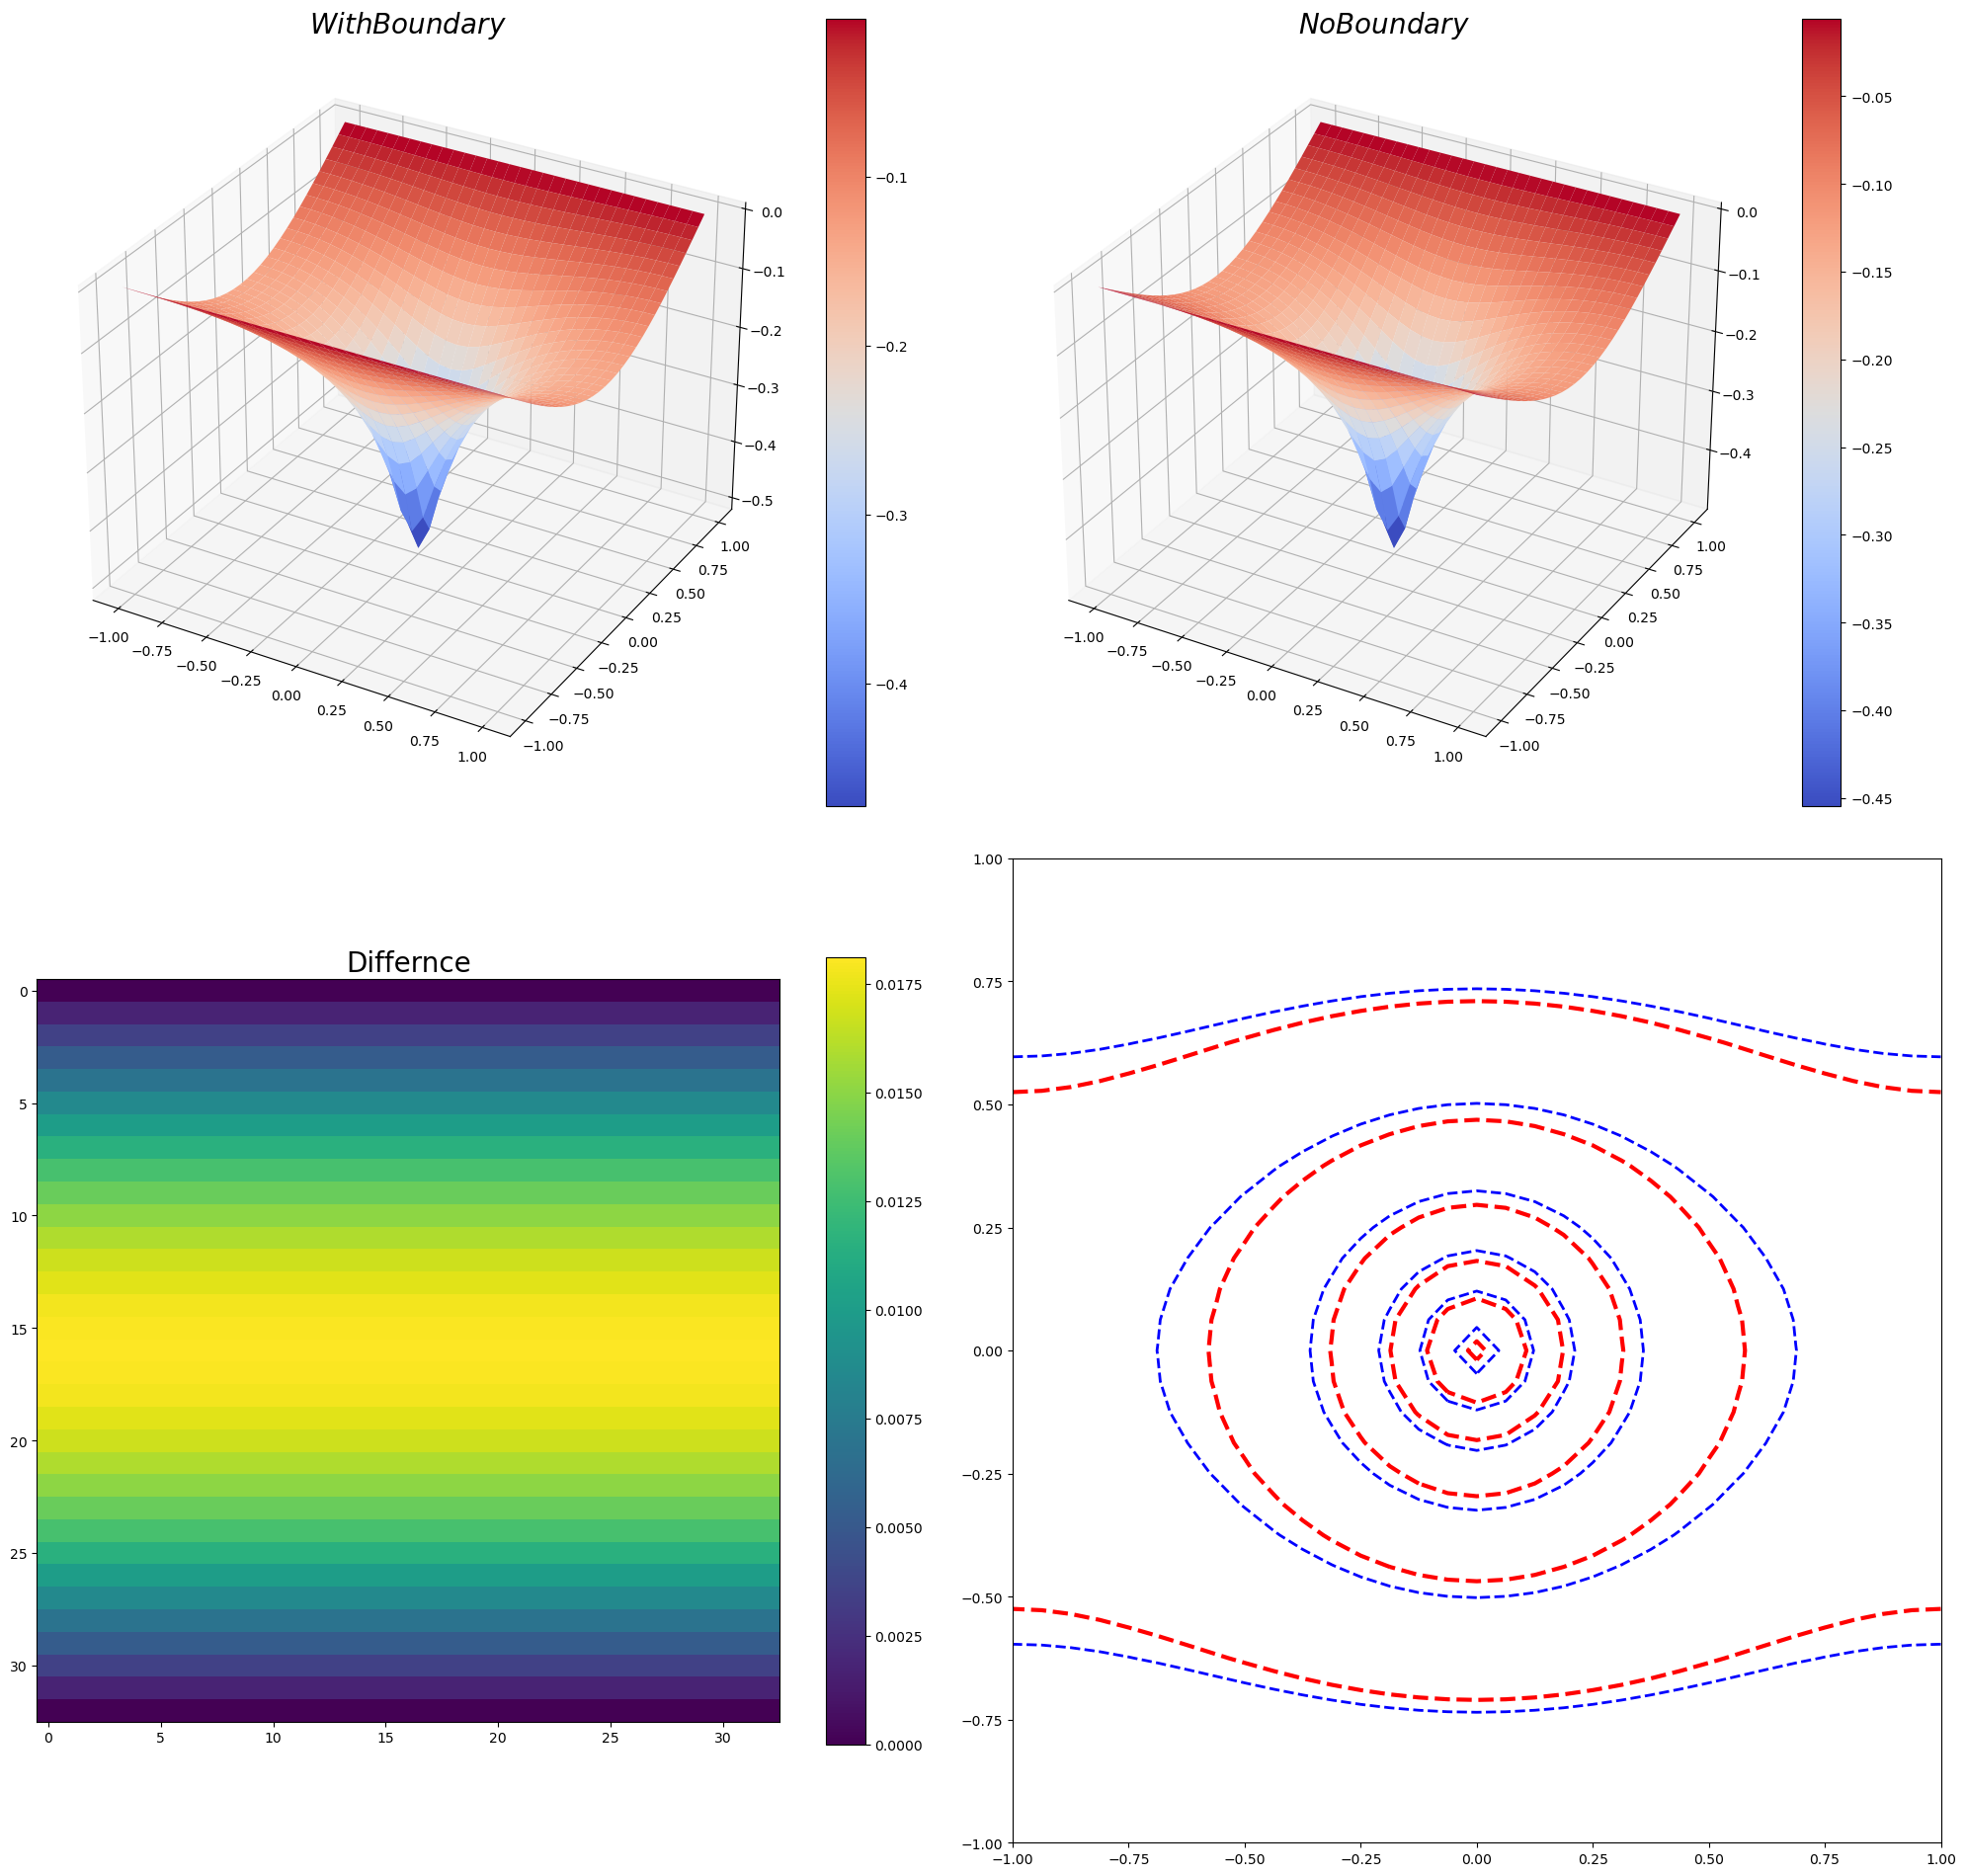

In [28]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
# g = normal(f[0], f[1], h=0.08)
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.set_title(f'$With Boundary$', fontsize=20)
surf_bc = ax1.plot_surface(xx, yy, w, cmap=cm.coolwarm,)
plt.colorbar(surf_bc, shrink=0.8, ax=ax1)

ax2.set_title(f'$No Boundary$', fontsize=20)
surf = ax2.plot_surface(xx, yy, u, cmap=cm.coolwarm,)
plt.colorbar(surf, shrink=0.8, ax=ax2)

ax3.set_title(f'Differnce', fontsize=20)
im = ax3.imshow(np.abs(w - u))
plt.colorbar(im, shrink=0.8, ax=ax3)

ct1 = ax4.contour(xx, yy, w, colors='b', linewidths=2)
ct2 = ax4.contour(xx, yy, u, colors='r', linewidths=3)

fig.tight_layout()

In [23]:
def fv_mesh(a, N):
    h = 2*a / N
    left, bottom = -a + h/2, -a + h/2
    right, top = a - h/2, a - h/2
    
    x = np.linspace(left, right, N)
    y = np.linspace(bottom, top, N)
    return np.meshgrid(x, y)

def fv_b_func(a, N, f):
    h = 2*a / N
    xx, yy = fv_mesh(a, N)
    f_mat = f(xx, yy).flatten()
    return f_mat * h * h

def fv_b_point(N):
    b = np.zeros(N*N)
    idx = N//2 + N * (N//2)
    b[idx] = 1
    return b

def fv_A_dirichlet(n):
    n2 = n**2
    A = sparse.lil_matrix((n2, n2))
    # Interior points
    for i in range(1, n-1):
        for j in range(1, n-1):
            idx = i * n + j
            A[idx, idx] = -4
            A[idx, idx+1] = A[idx, idx-1] = A[idx, idx-n] = A[idx, idx+n] = 1
    
    # Boundary points
    for i in range(1, n-1):
        # Top
        idx = i
        A[idx, idx] = -6
        A[idx, idx+1] = A[idx, idx-1] = 1
        A[idx, idx+n] = 4/3
        
        # Bottom
        idx = (n-1) * n + i
        A[idx, idx] = -6
        A[idx, idx+1] = A[idx, idx-1] = 1
        A[idx, idx-n] = 4/3
        
        # Left
        idx = i * n
        A[idx, idx] = -6
        A[idx, idx+n] = A[idx, idx-n] = 1
        A[idx, idx+1] = 4/3
        
        # Right
        idx = i * n + n - 1
        A[idx, idx] = -6
        A[idx, idx+n] = A[idx, idx-n] = 1
        A[idx, idx-1] = 4/3
        
    # Four corners
    # Left top
    idx = 0
    A[idx, idx] = -8
    A[idx, idx+1] = A[idx, idx+n] = 4/3
    # Right Top
    idx = n-1
    A[idx, idx] = -8
    A[idx, idx-1] = A[idx, idx+n] = 4/3
    # Left Bottom
    idx = (n-1) * n
    A[idx, idx] = -8
    A[idx, idx+1] = A[idx, idx-n] = 4/3
    # Right Bottom
    idx = n2 - 1
    A[idx, idx] = -8
    A[idx, idx-1] = A[idx, idx-n] = 4/3
    
    A = A.tocoo()
    return A


def fv_A_neu(n):
    '''
    Left and Right are neumann, top and down are dirichlet
    '''
    n2 = n**2
    A = sparse.lil_matrix((n2, n2))
    # Interior points
    for i in range(1, n-1):
        for j in range(1, n-1):
            idx = i * n + j
            A[idx, idx] = -4
            A[idx, idx+1] = A[idx, idx-1] = A[idx, idx-n] = A[idx, idx+n] = 1
    
    # Boundary points
    for i in range(1, n-1):
        # Top
        idx = i
        A[idx, idx] = -6
        A[idx, idx+1] = A[idx, idx-1] = 1
        A[idx, idx+n] = 4/3
        
        # Bottom
        idx = (n-1) * n + i
        A[idx, idx] = -6
        A[idx, idx+1] = A[idx, idx-1] = 1
        A[idx, idx-n] = 4/3
        
        # Left
        idx = i * n
        A[idx, idx] = -3
        A[idx, idx+n] = A[idx, idx-n] = A[idx, idx+1] = 1
        
        # Right
        idx = i * n + n - 1
        A[idx, idx] = -3
        A[idx, idx+n] = A[idx, idx-n] = A[idx, idx-1] = 1
        
    # Four corners
    
    # Left top
    idx = 0
    A[idx, idx] = -5
    A[idx, idx+n] = 4/3
    A[idx, idx+1] = 1
    
    # Right Top
    idx = n-1
    A[idx, idx] = -5
    A[idx, idx+n] = 4/3
    A[idx, idx-1] = 1
    
    # Left Bottom
    idx = (n-1) * n
    A[idx, idx] = -5
    A[idx, idx-n] = 4/3
    A[idx, idx+1] = 1
    
    # Right Bottom
    idx = n2 - 1
    A[idx, idx] = -5
    A[idx, idx-n] = 4/3
    A[idx, idx-1] = 1
    
    A = A.tocoo()
    return A
        


In [29]:
a = 1
N = 65
h = 2*a/N

f = lambda x, y: normal(x, y, h)
xx, yy = fv_mesh(a, N)
# A = fv_A_dirichlet(N).tocsr()
A = fv_A_neu(N).tocsr()
# b = fv_b_point(N)
b = fv_b_func(a, N, f)
# print(A.todense())
w = spsolve(A, b).reshape(N, N)
u = jacobi_2nd(A, b).reshape(N ,N)

itr:0 Difference: 7.053e-02,  Loss:2.27e-01
itr:1 Difference: 5.665e-02,  Loss:1.96e-01
itr:2 Difference: 4.903e-02,  Loss:1.76e-01
itr:3 Difference: 4.390e-02,  Loss:1.61e-01
itr:4 Difference: 4.013e-02,  Loss:1.49e-01
itr:5 Difference: 3.721e-02,  Loss:1.39e-01
itr:6 Difference: 3.484e-02,  Loss:1.32e-01
itr:7 Difference: 3.288e-02,  Loss:1.25e-01
itr:8 Difference: 3.122e-02,  Loss:1.19e-01
itr:9 Difference: 2.979e-02,  Loss:1.14e-01
itr:10 Difference: 2.854e-02,  Loss:1.10e-01
itr:11 Difference: 2.744e-02,  Loss:1.06e-01
itr:12 Difference: 2.645e-02,  Loss:1.02e-01
itr:13 Difference: 2.557e-02,  Loss:9.91e-02
itr:14 Difference: 2.476e-02,  Loss:9.61e-02
itr:15 Difference: 2.403e-02,  Loss:9.35e-02
itr:16 Difference: 2.336e-02,  Loss:9.10e-02
itr:17 Difference: 2.275e-02,  Loss:8.87e-02
itr:18 Difference: 2.218e-02,  Loss:8.66e-02
itr:19 Difference: 2.165e-02,  Loss:8.46e-02
itr:20 Difference: 2.115e-02,  Loss:8.28e-02
itr:21 Difference: 2.069e-02,  Loss:8.10e-02
itr:22 Difference: 2

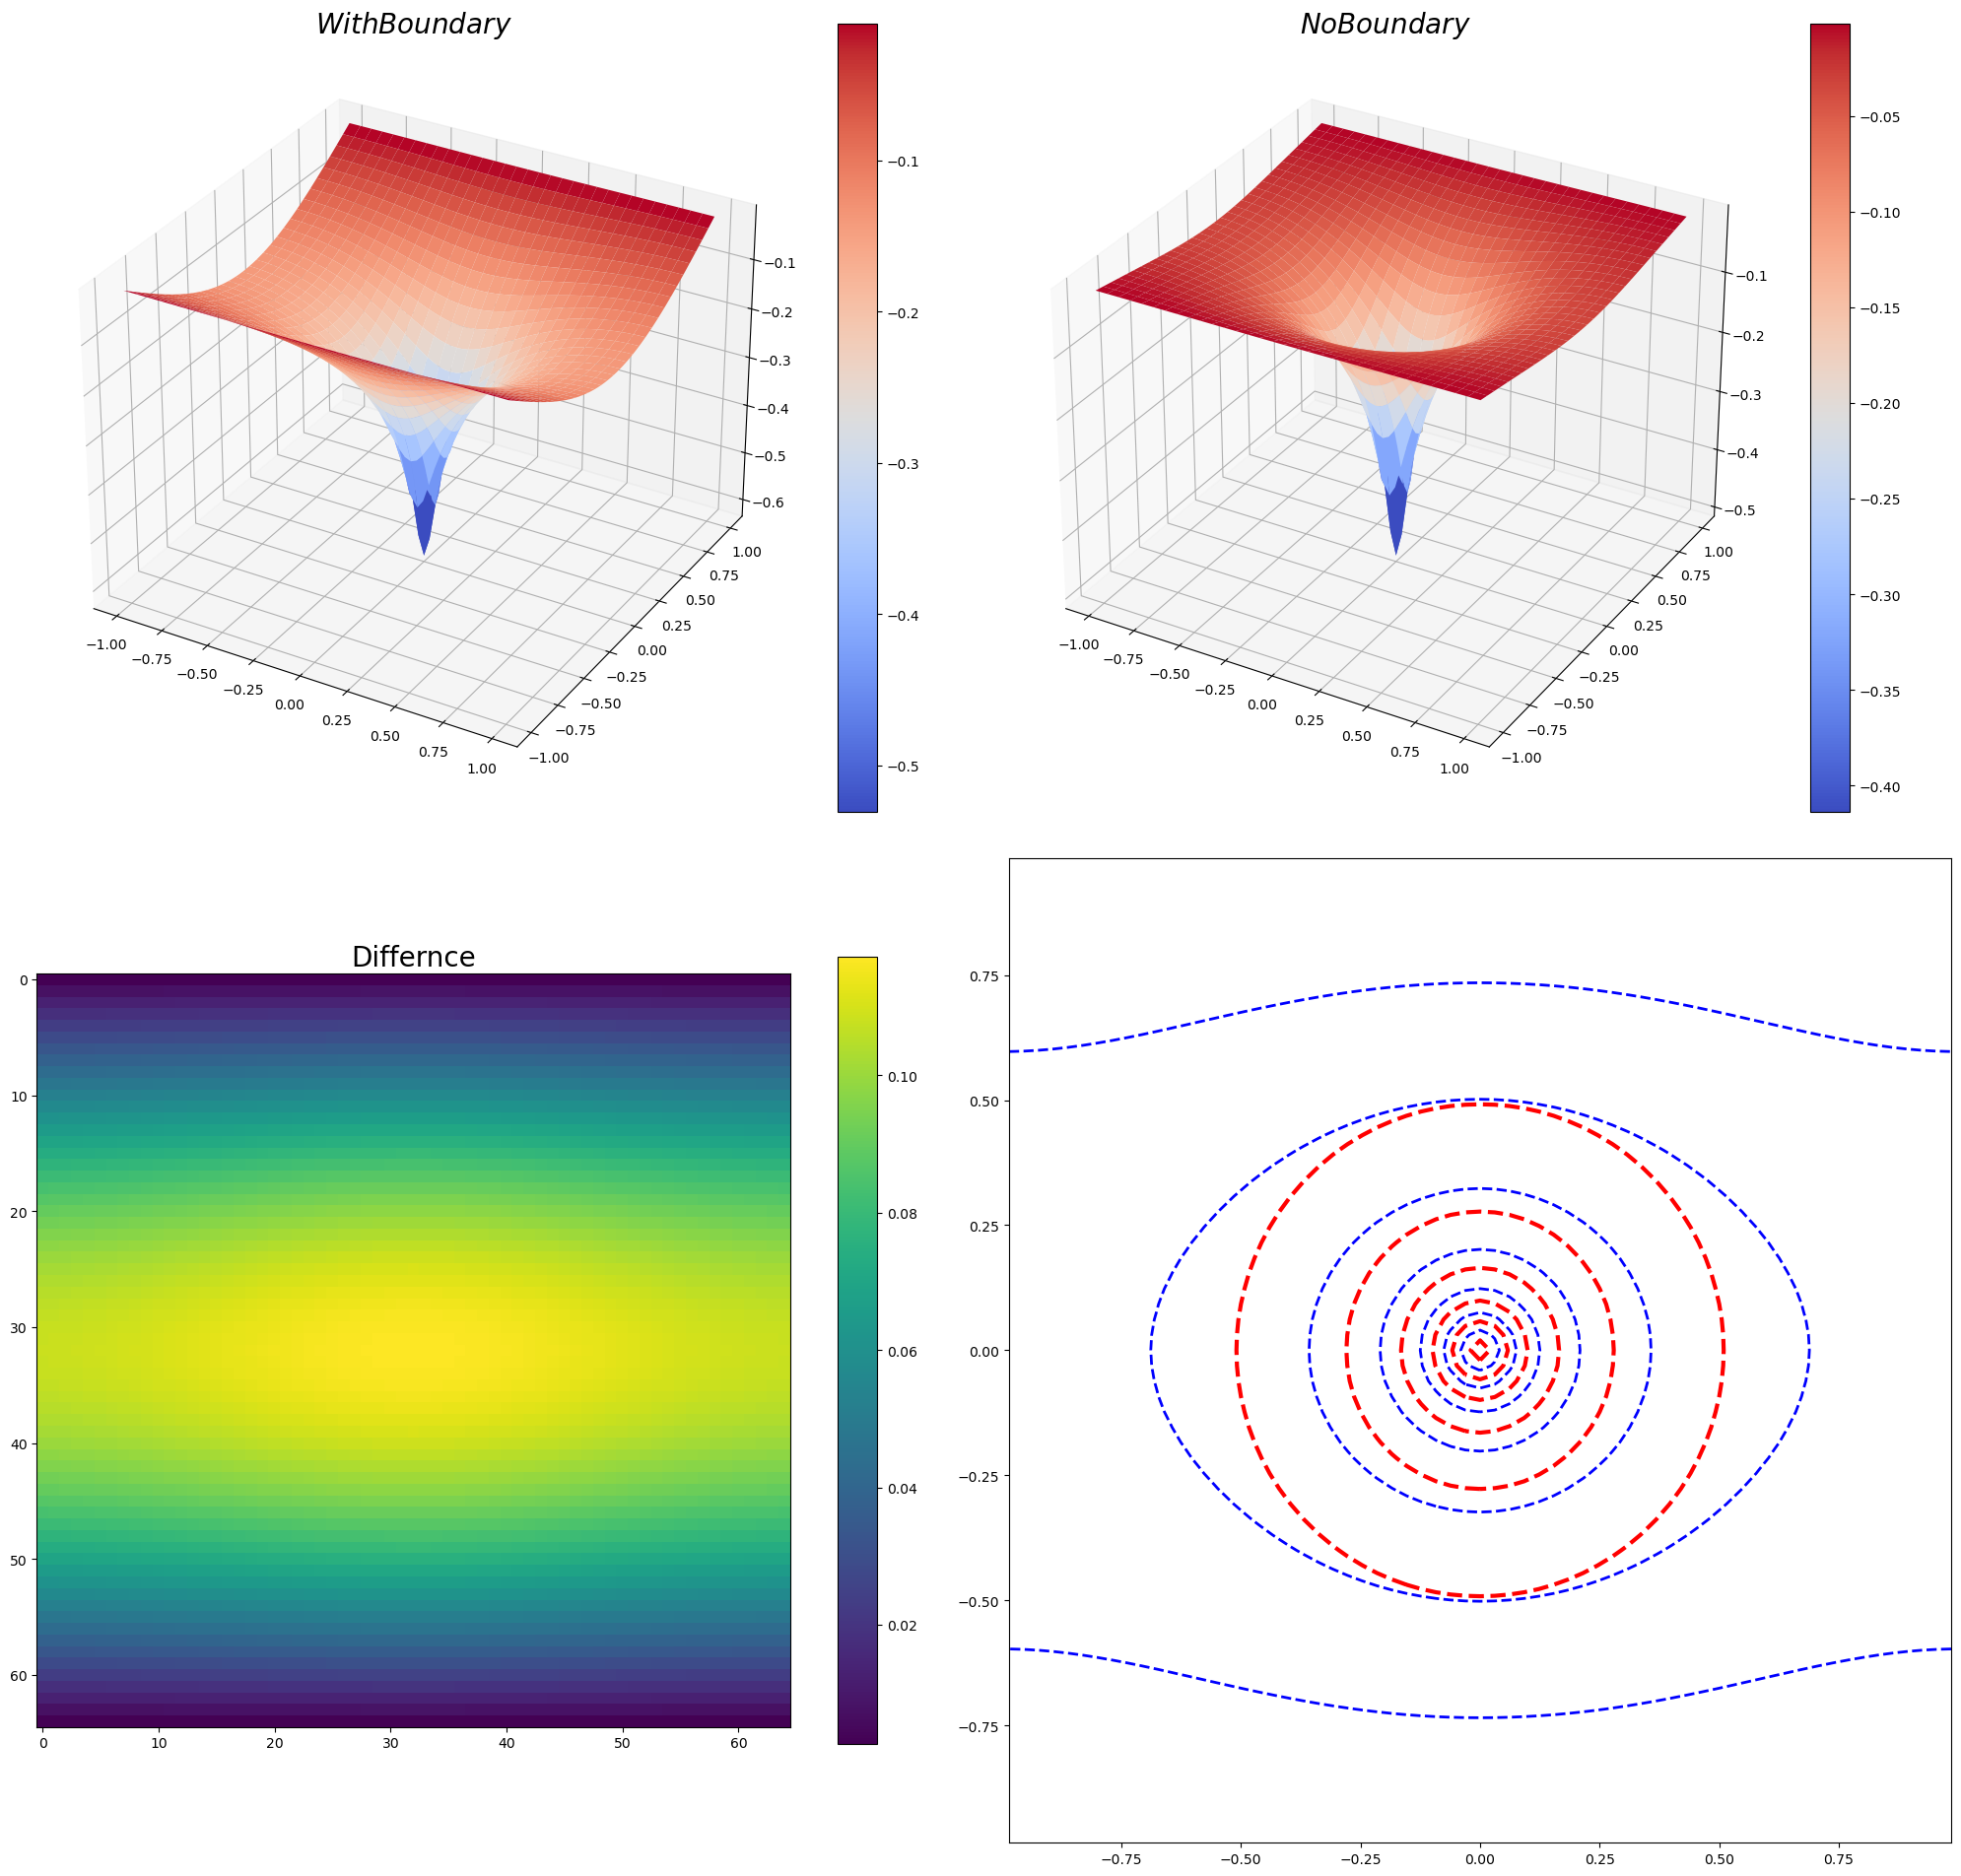

In [30]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
# g = normal(f[0], f[1], h=0.08)
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.set_title(f'$With Boundary$', fontsize=20)
surf_bc = ax1.plot_surface(xx, yy, w, cmap=cm.coolwarm,)
plt.colorbar(surf_bc, shrink=0.8, ax=ax1)

ax2.set_title(f'$No Boundary$', fontsize=20)
surf = ax2.plot_surface(xx, yy, u, cmap=cm.coolwarm,)
plt.colorbar(surf, shrink=0.8, ax=ax2)

ax3.set_title(f'Differnce', fontsize=20)
im = ax3.imshow(np.abs(w - u))
plt.colorbar(im, shrink=0.8, ax=ax3)

ct1 = ax4.contour(xx, yy, w, colors='b', linewidths=2)
ct2 = ax4.contour(xx, yy, u, colors='r', linewidths=3)

fig.tight_layout()